<a href="https://colab.research.google.com/github/shaikhmyousuf/Cranfield_IRP/blob/main/Fusion%20CFZ2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

#Initialise MSE data

In [2]:
#----------RADAR----------------------------------------------------------------
mse_RAD = [0.24490343490647906,
           0.2500962783823051,
           0.2570236659722804,
           0.39526157842492904,
           0.987337642816664,
           0.9874340790269537,
           0.34048558654614053,
           0.305389015792793,
           0.406337774391572,
           0.24970513190144195,
           0.2556035855092642,
           0.2510336885925659,
           0.30353341936234224,
           0.3130239750002687,
           0.45655013851283777,
           0.2978679903425893,
           0.30649225642242717,
           0.4155316542508795,
           0.2585334502759715,
           0.2969530190903104,
           0.34048560239606296,
           0.2525401085404123,
           0.28633497757117976,
           0.29468141973805684,
           0.40321551766577274]

max_mse_RAD = 0.6517867447980759
threshold_rad = 0.4395077532585708

#----------RGB CAMERA-----------------------------------------------------------
mse_RGB=[0.013616456254090414,
         0.016719836249357273,
         0.02313002485655174,
         0.007761364796544504,
         0.01180607201944064,
         0.013408955548263839,
         0.016525746521327316,
         0.007521064453557312,
         0.007422078615338621,
         0.007658099188341045,
         0.007634578029152772,
         0.007641812216594634,
         0.0076432277415384945,
         0.007565688998530502,
         0.0075129573225356,
         0.007420941185006894,
         0.007398428740811726,
         0.007526532290711312,
         0.007388792067404964,
         0.007457408035967659,
         0.007442698194730198,
         0.0075441008337654315,
         0.007551937440653449,
         0.007604709936102709,
         0.007530906257316021]

max_mse_RGB = 0.012793092043838812
threshold_rgb = 0.011557073446068588

In [3]:
mse_rad = np.asarray(mse_RAD)
mse_rad /= max_mse_RAD
threshold_rad /= max_mse_RAD 

mse_rgb = np.asarray(mse_RGB)
mse_rgb /= max_mse_RGB
threshold_rgb /= max_mse_RGB 

#Fusion of thresholds tested

In [4]:
print(threshold_rad)
print(threshold_rgb)

0.6743121991453366
0.903383904881268


In [35]:
weight_rgb = 0.4
weight_rad = 0.6
threshold_cfz = (weight_rgb*threshold_rgb) + (weight_rad*threshold_rad)
print(threshold_cfz)

0.7659408814397092


#Fusion of MSEs

In [36]:
mse_cfz = (mse_rgb*weight_rgb) + (mse_rad*weight_rad)
mse_cfz

array([0.65118902, 0.75300227, 0.95980581, 0.60653028, 1.27802917,
       1.3282351 , 0.83014125, 0.51628496, 0.60611801, 0.46931001,
       0.47400437, 0.47002376, 0.51839646, 0.52470857, 0.65518232,
       0.50623097, 0.51346611, 0.61784734, 0.46901649, 0.5065289 ,
       0.54614273, 0.46835536, 0.49971014, 0.50904346, 0.60664653])

In [37]:
mse_cfz.shape

(25,)

In [38]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt

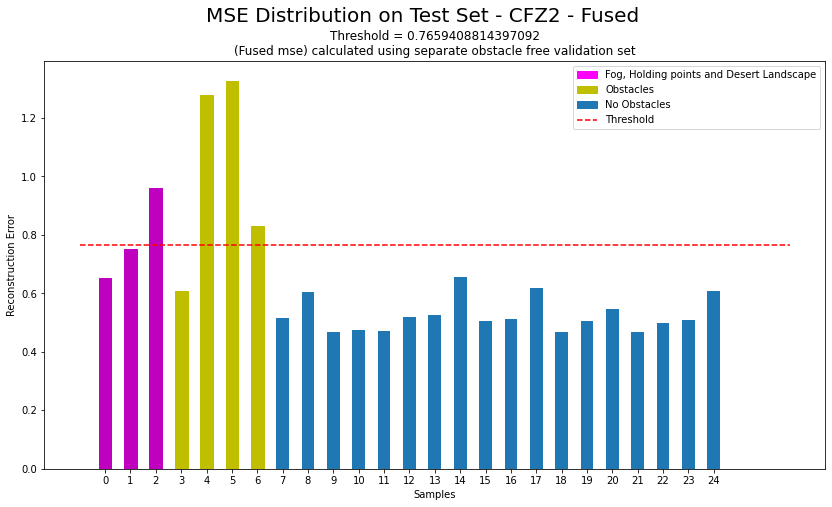

In [46]:

x= range(25)
y= mse_cfz
fig, ax = plt.subplots(figsize=(14, 7.5))
barlist = plt.bar(x,y, width=0.5)
barlist[0].set_color('m')
barlist[1].set_color('m')
barlist[2].set_color('m')
barlist[3].set_color('y')
barlist[4].set_color('y')
barlist[5].set_color('y')
barlist[6].set_color('y')
# barlist[7].set_color('y')
# barlist[8].set_color('y')
plt.hlines(threshold_cfz,-1,27,color='red', linestyle='--')

#Title and axes
plt.suptitle('MSE Distribution on Test Set - CFZ2 - Fused', fontsize = 20)
plt.title('Threshold = '+str(threshold_cfz)+'\n'+'(Fused mse) calculated using separate obstacle free validation set')
plt.xlabel('Samples', fontsize = 10)
plt.ylabel('Reconstruction Error',fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(25),fontsize = 10)

#Legend
handles, labels = plt.gca().get_legend_handles_labels()
blue_patch = mpatches.Patch(color='tab:blue',label='No Obstacles')
yellow_patch = mpatches.Patch(color='y',label='Obstacles')
mag_patch = mpatches.Patch(color='magenta',label='Fog, Holding points and Desert Landscape')
line = Line2D([0],[0], label='Threshold',color='r',linestyle='--')
handles.extend([mag_patch, yellow_patch,blue_patch,line])
plt.legend(handles=handles)

plt.show()



In [40]:
true_action_list = []
for k in range(25):
    if (2<k<7):
      action = 'stop'
    else:
      action = "go"
    true_action_list.append(action)
true_action_list

['go',
 'go',
 'go',
 'stop',
 'stop',
 'stop',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go']

In [41]:
action_cfz = []
for i in range(25):
  if mse_cfz[i] > threshold_cfz:
    action = 'stop'
  else:
    action = 'go'
  action_cfz.append(action)
action_cfz

['go',
 'go',
 'stop',
 'go',
 'stop',
 'stop',
 'stop',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go',
 'go']

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

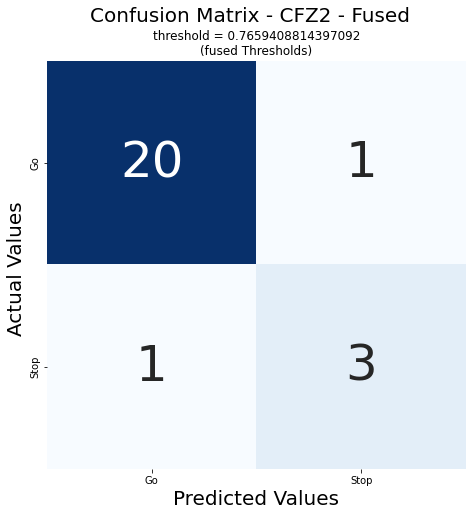

In [47]:
cm = confusion_matrix(true_action_list, action_cfz)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fx = sns.heatmap(cm, annot=True, cmap='Blues',cbar=False, annot_kws={'fontsize':50})

# labels the title and x, y axis of plot
plt.suptitle('Confusion Matrix - CFZ2 - Fused', fontsize = 20)
plt.title('threshold = '+str(threshold_cfz)+'\n'+'(fused Thresholds)')

# fx.set_xlabel('Predicted Values', )
plt.xlabel('Predicted Values', fontsize = 20)
plt.ylabel('Actual Values ', fontsize = 20);

# labels the boxes
fx.xaxis.set_ticklabels(['Go','Stop'])
fx.yaxis.set_ticklabels(['Go','Stop'])


plt.show()

In [48]:
cm

array([[20,  1],
       [ 1,  3]])

In [ ]:
accuracy = cm